In [1]:
#!pip install scikit-surprise

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
jokes = pd.read_csv('jokes.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [5]:
jokes.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [6]:
train['joke_text'] = train[['joke_id']].merge(jokes, how='left')['joke_text']

In [7]:
train.head()

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,16144_109,16144,109,5.094,One day the first grade teacher was reading th...
2,23098_6,23098,6,-6.438,Q. What is orange and sounds like a parrot? A....
3,14273_86,14273,86,4.406,Two attorneys went into a diner and ordered tw...
4,18419_134,18419,134,9.375,A man is driving in the country one evening wh...


# Data Viz

In [8]:
## Display some jokes
for joke in jokes.joke_text.sample(n=10):
    print(joke)
    print()

An astronomer, a physicist and a mathematician (it is said) were holidaying in Scotland. Glancing from a train window, they observed a black sheep in the middle of a field. "How interesting," observed the astronomer, "All Scottish sheep are black!" To which the physicist responded, "No, no! Some Scottish sheep are black!" The mathematician gazed heavenward in supplication, and then intoned, "In Scotland there exists at least one field, containing at least one sheep, at least one side of which is black."

Early one morning a mother went to her sleeping son and woke him up. "Wake up, son. It's time to go to school." "But why, Mama? I don't want to go to school." "Give me two reasons why you don't want to go to school." "One, all the children hate me. Two, all the teachers hate me." "Oh, that's no reason. Come on, you have to go to school." "Give me two good reasons why I should go to school." "One, you are fifty-two years old. Two, you are the principal of the school."

Out in the backwo

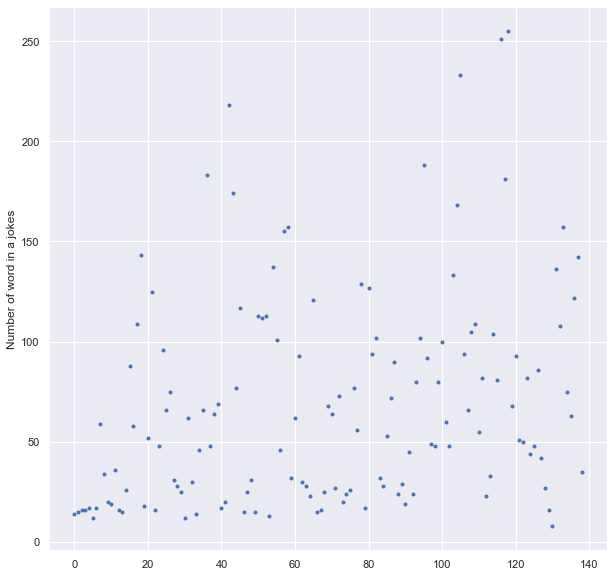

In [9]:
len_jokes = []
for x in jokes.joke_text:
    len_jokes.append(len(x.split()))
plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
plt.plot(np.arange(0,len(len_jokes)), len_jokes, '.')
plt.ylabel('Number of word in a jokes')
plt.show()

In [10]:
jokes_mean = train[['joke_id', 'joke_text', 'Rating']].groupby('joke_id').mean()
jokes_mean.head()

,Rating
joke_id,
1,-2.246770
2,-1.933251
3,-0.671942
4,-0.604674
5,-1.415667


In [11]:
jokes_mean.Rating.describe()

count    139.000000
mean       1.620978
std        1.465558
min       -2.734815
25%        0.766440
50%        1.865004
75%        2.822265
max        3.733667
Name: Rating, dtype: float64

In [12]:
train.Rating.describe()

count    1.092059e+06
mean     1.758394e+00
std      5.230860e+00
min     -1.000000e+01
25%     -1.719000e+00
50%      2.344000e+00
75%      5.781000e+00
max      1.000000e+01
Name: Rating, dtype: float64

Just by seing these figures, we can notice that not everyone shares the same sense of humour haha

In [13]:
jokes_mean['number_of_ratings'] = train.groupby('joke_id')['Rating'].count()
jokes_mean.head()

,Rating,number_of_ratings
joke_id,,
1,-2.246770,387
2,-1.933251,27361
3,-0.671942,27369
4,-0.604674,27368
5,-1.415667,27402


Text(0, 0.5, 'Proportion')

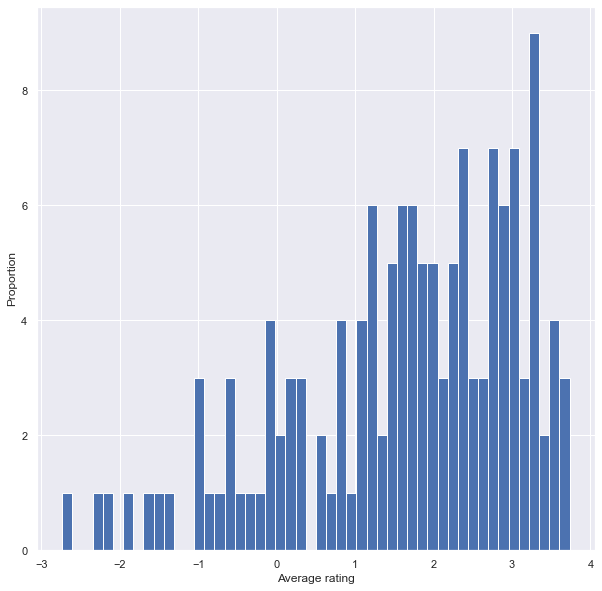

In [14]:
plt.figure(figsize=(10,10))
jokes_mean['Rating'].hist(bins=50)
plt.xlabel('Average rating')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

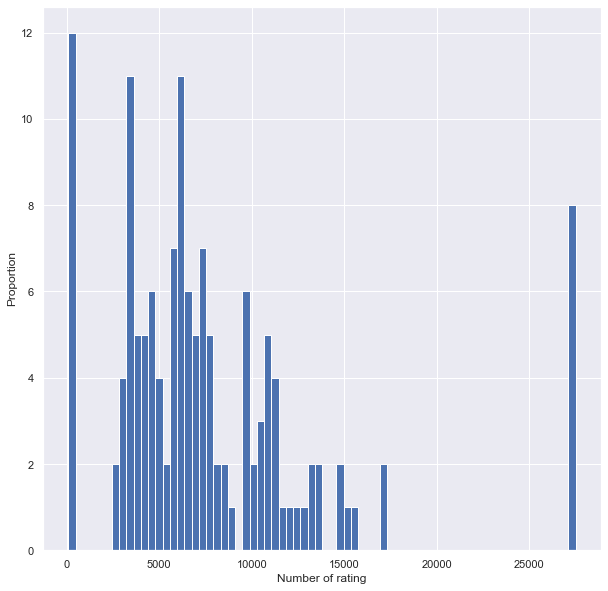

In [15]:
plt.figure(figsize=(10,10))
jokes_mean['number_of_ratings'].hist(bins=70)
plt.xlabel('Number of rating')
plt.ylabel('Proportion')

Most jokes have few ratings and the jokes with the most ratings are probably 'common jokes'

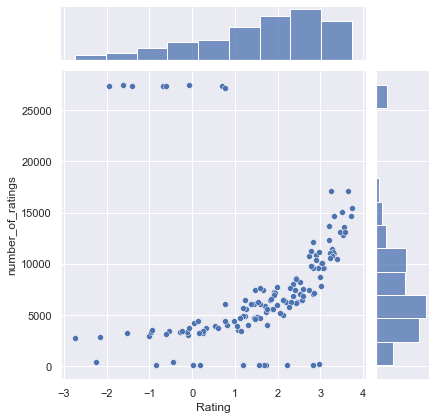

In [16]:
sns.jointplot(x='Rating', y='number_of_ratings', data=jokes_mean)

From the diagram we can see that their is a positive relationship between the average rating of a joke and the number of ratings (with some exception). The graph indicates that the more the ratings a jokes gets the higher the average rating it gets. This is important to note especially when choosing the threshold for the number of ratings per jokes.

# Matrix for recommender system

In [17]:
jokes_matrix = train.pivot_table(index='user_id', columns='joke_id', values='Rating')
jokes_matrix.head()

joke_id,1,2,3,4,5,6,7,8,9,10,...,130,131,132,133,134,135,136,137,138,139
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.219,-9.281,NaN,-6.781,0.875,-9.656,-9.031,-7.469,-8.719,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-9.688,9.938,9.531,9.938,0.406,NaN,9.656,NaN,NaN,-9.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-7.219,-2.031,-9.938,NaN,NaN,-9.812,-9.781,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.906,NaN,-5.906,NaN,NaN,3.875,6.219,NaN,6.094,5.406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.031,NaN,NaN,7.500,-7.219,NaN,NaN,NaN,3.656,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Basic Collaborative filtering Algorithm

## Surprise

In [18]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD, SVDpp, NMF
from surprise import SlopeOne, CoClustering

In [19]:
# Set Rating Scale
reader = Reader(rating_scale=(-10, 10))

# Load data with rating scale
data = Dataset.load_from_df(train[['user_id', 'joke_id', 'Rating']], reader)

### k-NN Based Algorithm

In [20]:
#knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=2, n_jobs=1, verbose=False)  ## Too slow ..
#knnz_cv = cross_validate(KNNWithZScore(), data, cv=2, n_jobs=1, verbose=False) ## Too slow because of the testing...

### Matrix Factorization

In [21]:
## SVD
svd_cv = cross_validate(SVD(), data, cv=2, n_jobs=1, verbose=False)
svdpp_cv = cross_validate(SVDpp(), data, cv=2, n_jobs=1, verbose=False)

### Others

In [22]:
coclus_cv = cross_validate(CoClustering(), data, cv=2, n_jobs=1, verbose=False)

In [23]:
print('Algorithm\t RMSE\t\t MAE')
print()
# print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))
# print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4)) too slow ..
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4))
print('SVDpp', '\t\t', round(svdpp_cv['test_rmse'].mean(), 4), '\t', round(svdpp_cv['test_mae'].mean(), 4))

print()
print('CoClustering', '\t', round(coclus_cv['test_rmse'].mean(), 4), '\t', round(coclus_cv['test_mae'].mean(), 4))
print()

Algorithm	 RMSE		 MAE


SVD 		 4.3055 	 3.2854
SVDpp 		 5.0076 	 3.7405

CoClustering 	 4.3952 	 3.368



As SVD has the least RMSE value we will tune the hyper-parameters of SVD.

### SVD (Singular Value Decomposition)

In [25]:
# Parameter space
svd_param_grid = {'n_factors' : [40, 70, 100],
                  'n_epochs': [20, 25], 
                  'lr_all': [0.002, 0.005, 0.009, 0.01],
                  'reg_all': [0.01, 0.05, 0.10]}
gs = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=2, refit=True) ## I can only 2 cv
gs.fit(data) 
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse']) 
print(gs.best_params['rmse'])
#Assigning values
t = gs.best_params 
factors = t['rmse']['n_factors']
epochs = t['rmse']['n_epochs'] 
lr_value = t['rmse']['lr_all']
reg_value = t['rmse']['reg_all']

4.179296358450363
{'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.1}


In [35]:
predictions = []
for idx, row in test.iterrows():
    uid, iid = row['user_id'], row['joke_id']
    predictions.append(algo.predict(uid=uid, iid=iid).est)

In [37]:
test['Rating'] = predictions
test[['id', 'Rating']].to_csv('sub_svd.csv', index=False)

Score of 4.0432